In [1]:
import numpy as np
import pandas_profiling
from scipy.stats import mode
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Read dataset
heartf = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
# First 5 and last 5 records
heartf.head(5)
heartf.tail(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [4]:
# Data dimensions
heartf.shape

(299, 13)

In [5]:
# Data info
heartf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
# Count rows
heartf.count()

age                         299
anaemia                     299
creatinine_phosphokinase    299
diabetes                    299
ejection_fraction           299
high_blood_pressure         299
platelets                   299
serum_creatinine            299
serum_sodium                299
sex                         299
smoking                     299
time                        299
DEATH_EVENT                 299
dtype: int64

In [7]:
# No. of unique values in data
heartf.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [8]:
# Null values, if any, in every column
print(heartf.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [9]:
#Calculate summary statistics
summary = heartf.describe()
summary = summary.transpose()
summary.head()

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0


In [10]:
# Pandas profiling for a comprehensive report
# pandas_profiling.ProfileReport(heartf)

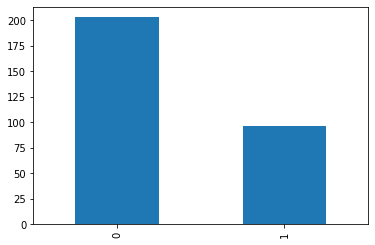

In [11]:
# Null model
heartf['DEATH_EVENT'].value_counts().plot(kind='bar')

$$\large{null \space accuracy = \frac{\# \space times \space model \space predicted \space no \space heart \space failure}{total \space number \space of \space predictions}}$$

In [12]:
# Find the null model
heartf['DEATH_EVENT'].value_counts() / heartf.shape[0]

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64

In this particular instance, the null model (always predicting `"No death event"`) is 67.8% - and any meaningful model that improves performance will have to break that accuracy score. 

## **Data Cleaning**

In [13]:
# No. of missing values
heartf.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [14]:
# Dimensions of the data and investigate if there are any duplicate rows
heartf.head()
heartf.shape

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


(299, 13)

## **Exploratory Analysis for Machine Learning**

In [15]:
# Take a look at the head
heartf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [16]:
# Get dtypes of column
heartf.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [17]:
# Get all features
features = [column_name for column_name in heartf.columns if column_name != 'DEATH_EVENT']

# Get all categorical features
categorical = [column_name for column_name in features if heartf[column_name].nunique() == 2]

# Get all numeric columns
numeric = [column_name for column_name in features if column_name not in categorical]

In [18]:
#Print out the features
print("Features : ")
features
print("Target : ",[column_name for column_name in heartf.columns if column_name == 'DEATH_EVENT'])

Features : 


['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time']

Target :  ['DEATH_EVENT']


In [19]:
# Print out the catergorical features 
categorical

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

In [20]:
# Print out the numeric features
numeric

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

## **Data Pre-Processing for Machine Learning**

In [21]:
# Split data between X and label
X = heartf[features]
y = heartf['DEATH_EVENT']

In [22]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into train test splits
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size = 0.20, random_state=123)

In [23]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Intialize a scaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(train_X[numeric])

# Transform training and test data
train_numeric_transform = scaler.transform(train_X[numeric])
test_numeric_transform = scaler.transform(test_X[numeric])

StandardScaler()

In [24]:
# Replace columns in training and testing data accordingly
train_X[numeric] = train_numeric_transform
test_X[numeric] = test_numeric_transform

<ipython-input-24-238200fff1f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X[numeric] = train_numeric_transform
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-24-238200fff1f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

## **Modeling**

#### **Using K-Nearest Neighbors to Generate Predictions**

In [25]:
# Import K-Nearest Neighbor Classifier and accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

# Instantiate K Nearest Neighbors with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit on training data
knn.fit(train_X, train_Y)

# Create Predictions
pred_test_Y = knn.predict(test_X)
pred_train_Y = knn.predict(train_X)

# Calculate accuracy score on testing data
test_accuracy = accuracy_score(test_Y, pred_test_Y)
train_accuracy = accuracy_score(train_Y, pred_train_Y)

# Print test accuracy score rounded to 4 decimals
print('Test accuracy:', round(test_accuracy, 4))
print('Train accuracy:', round(train_accuracy, 4))

KNeighborsClassifier(n_neighbors=6)

Test accuracy: 0.6833
Train accuracy: 0.7866


#### **Using Decision Trees and Random Forests to Generate Predictions**

In [26]:
# Import relevant packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Instantiate decision tree and random forest classifiers
dec_tree = DecisionTreeClassifier(random_state = 123)
rand_forest = RandomForestClassifier(random_state = 123)

# Fit decision tree and random forest on data
dec_tree.fit(train_X, train_Y)
rand_forest.fit(train_X, train_Y)

# Create Predictions on test and train data using decision tree
pred_test_Y_tree = dec_tree.predict(test_X)
pred_train_Y_tree = dec_tree.predict(train_X)

# Create Predictions on test and train data using random forest
pred_test_Y_forest = rand_forest.predict(test_X)
pred_train_Y_forest = rand_forest.predict(train_X)

# Calculate test and train accuracy score on decision tree
test_accuracy_tree = accuracy_score(test_Y, pred_test_Y_tree)
train_accuracy_tree = accuracy_score(train_Y, pred_train_Y_tree)

# Calculate test and train accuracy score on random forest
test_accuracy_forest = accuracy_score(test_Y, pred_test_Y_forest)
train_accuracy_forest = accuracy_score(train_Y, pred_train_Y_forest)

# Print test accuracy score rounded to 4 decimals
print('Tree test accuracy:', round(test_accuracy_tree, 4))
print('Tree train accuracy:', round(train_accuracy_tree, 4))

# Print test accuracy score rounded to 4 decimals
print('\nForest test accuracy:', round(test_accuracy_forest, 4))
print('Forest train accuracy:', round(train_accuracy_forest, 4))

DecisionTreeClassifier(random_state=123)

RandomForestClassifier(random_state=123)

Tree test accuracy: 0.8167
Tree train accuracy: 1.0

Forest test accuracy: 0.7833
Forest train accuracy: 1.0


#### **Using Support Vector Machines to Generate Predictions**

In [27]:
#Support Vector Machines
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'linear', random_state = 123)
svc_classifier.fit(train_X, train_Y)

# Create Predictions on test and train data using SVM
pred_test_Y_svc = svc_classifier.predict(test_X)
pred_train_Y_svc = svc_classifier.predict(train_X)

# Calculate test and train accuracy score on SVM
test_accuracy_svc = accuracy_score(test_Y, pred_test_Y_tree)
train_accuracy_svc = accuracy_score(train_Y, pred_train_Y_tree)

# Print test accuracy score rounded to 4 decimals
print('Test accuracy:', round(test_accuracy_svc, 4))
print('Train accuracy:', round(train_accuracy_svc, 4))

SVC(kernel='linear', random_state=123)

Test accuracy: 0.8167
Train accuracy: 1.0


#### **Cross Validation**

In [28]:
# Import relevant modules 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Instantiate decision tree
dec_tree = DecisionTreeClassifier(random_state = 123)

# Get cross validation scores
cv_scores = cross_val_score(dec_tree, train_X, train_Y, cv = 10)

# Fit on training data and get predictions
dec_tree.fit(train_X, train_Y)
y_pred = dec_tree.predict(test_X)

# Fit on data
print(cv_scores)
print("\nMean cross-val score:", round(np.mean(cv_scores), 4))
print("\nTest score:", round(accuracy_score(y_pred, test_Y), 4))

DecisionTreeClassifier(random_state=123)

[0.79166667 0.75       0.83333333 0.83333333 0.79166667 0.95833333
 0.66666667 0.625      0.70833333 0.60869565]

Mean cross-val score: 0.7567

Test score: 0.8167


In [29]:
# Import relevant modules 
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Instantiate svc
svc_classifier = SVC(kernel = 'linear', random_state = 123)
# Get cross validation scores
cv_scores = cross_val_score(svc_classifier, train_X, train_Y, cv = 10)

# Fit on training data and get predictions
svc_classifier.fit(train_X, train_Y)
y_pred = svc_classifier.predict(test_X)

# Fit on data
print(cv_scores)
print("\nMean cross-val score:", round(np.mean(cv_scores), 4))
print("\nTest score:", round(accuracy_score(y_pred, test_Y), 4))

SVC(kernel='linear', random_state=123)

[0.91666667 0.75       0.91666667 0.83333333 0.875      0.95833333
 0.75       0.70833333 0.83333333 0.7826087 ]

Mean cross-val score: 0.8324

Test score: 0.8333


## **Hyperparameter Tuning and grid-search**

In [30]:
# Get all parameters of a decision tree
dec_tree = DecisionTreeClassifier()
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [31]:
# Get all parameters of a decision tree
svc = SVC()
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

#### **Tuning maximum depth**

In [32]:
# Import relevant modules
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score

# Instantiate a decision tree with max_depth = 4
dec_tree = DecisionTreeClassifier(random_state = 123, max_depth = 4)

# Get cross validation scores
cv_scores = cross_val_score(dec_tree, train_X, train_Y, cv = 10)

# Fit on training data and get predictions
dec_tree.fit(train_X, train_Y)
y_pred = dec_tree.predict(test_X)

# Print accuracy scores
print(cv_scores)
print("\nMean cross-val score:", round(np.mean(cv_scores), 4))
print("\nTest score:", round(accuracy_score(y_pred, test_Y), 4))

DecisionTreeClassifier(max_depth=4, random_state=123)

[0.70833333 0.75       0.875      0.83333333 0.875      0.875
 0.79166667 0.625      0.70833333 0.69565217]

Mean cross-val score: 0.7737

Test score: 0.8333


In [33]:
# Import relevant modules 
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Instantiate decision tree
svc_classifier = SVC(kernel = 'linear', random_state = 123, gamma=0.1)
# Get cross validation scores
cv_scores = cross_val_score(svc_classifier, train_X, train_Y, cv = 10)

# Fit on training data and get predictions
svc_classifier.fit(train_X, train_Y)
y_pred = svc_classifier.predict(test_X)

# Fit on data
print(cv_scores)
print("\nMean cross-val score:", round(np.mean(cv_scores), 4))
print("\nTest score:", round(accuracy_score(y_pred, test_Y), 4))

SVC(gamma=0.1, kernel='linear', random_state=123)

[0.91666667 0.75       0.91666667 0.83333333 0.875      0.95833333
 0.75       0.70833333 0.83333333 0.7826087 ]

Mean cross-val score: 0.8324

Test score: 0.8333


#### **Tuning maximum features**

In [34]:
# Import relevant modules
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score

# Instantiate a decision tree with max_depth = 4 and max_features = 10
dec_tree = DecisionTreeClassifier(random_state = 123, max_depth = 4, max_features = 10)

# Get cross validation scores
cv_scores = cross_val_score(dec_tree, train_X, train_Y, cv = 10)

# Fit on training data and get predictions
dec_tree.fit(train_X, train_Y)
y_pred = dec_tree.predict(test_X)

# Print accuracy scores
print(cv_scores)
print("\nMean cross-val score:", round(np.mean(cv_scores), 4))
print("\nTest score:", round(accuracy_score(y_pred, test_Y), 4))

DecisionTreeClassifier(max_depth=4, max_features=10, random_state=123)

[0.79166667 0.70833333 0.83333333 0.83333333 0.875      0.875
 0.79166667 0.70833333 0.66666667 0.65217391]

Mean cross-val score: 0.7736

Test score: 0.8333


#### **Using grid-search**

In [35]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define parameter grid
params = {'max_depth': [6,8,10,12],
          'max_features': [20,25,30]}

# Instantiate a decision tree classifier 
dec_tree = DecisionTreeClassifier(random_state = 123)

# Instantiate a GridSearchCV classifier with 10 fold cross-validation
clf = GridSearchCV(dec_tree, params, cv = 10, verbose = 2)

# Fit clf on training data
clf.fit(train_X, train_Y)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] max_depth=6, max_features=20 ....................................
[CV] ..................... max_depth=6, max_features=20, total=   0.0s
[CV] max_depth=6, max_features=20 ....................................
[CV] ..................... max_depth=6, max_features=20, total=   0.0s
[CV] max_depth=6, max_features=20 ....................................
[CV] ..................... max_depth=6, max_features=20, total=   0.0s
[CV] max_depth=6, max_features=20 ....................................
[CV] ..................... max_depth=6, max_features=20, total=   0.0s
[CV] max_depth=6, max_features=20 ....................................
[CV] ..................... max_depth=6, max_features=20, total=   0.0s
[CV] max_depth=6, max_features=20 ....................................
[CV] ..................... max_depth=6, max_features=20, total=   0.0s
[CV] max_depth=6, max_features=20 ....................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 279, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\User\anaconda3\lib\

[CV] ..................... max_depth=6, max_features=25, total=   0.0s
[CV] max_depth=6, max_features=25 ....................................
[CV] ..................... max_depth=6, max_features=25, total=   0.0s
[CV] max_depth=6, max_features=25 ....................................
[CV] ..................... max_depth=6, max_features=25, total=   0.0s
[CV] max_depth=6, max_features=30 ....................................
[CV] ..................... max_depth=6, max_features=30, total=   0.0s
[CV] max_depth=6, max_features=30 ....................................
[CV] ..................... max_depth=6, max_features=30, total=   0.0s
[CV] max_depth=6, max_features=30 ....................................
[CV] ..................... max_depth=6, max_features=30, total=   0.0s
[CV] max_depth=6, max_features=30 ....................................
[CV] ..................... max_depth=6, max_features=30, total=   0.0s
[CV] max_depth=6, max_features=30 ....................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 279, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters wil

[CV] ..................... max_depth=8, max_features=20, total=   0.0s
[CV] max_depth=8, max_features=20 ....................................
[CV] ..................... max_depth=8, max_features=20, total=   0.0s
[CV] max_depth=8, max_features=20 ....................................
[CV] ..................... max_depth=8, max_features=20, total=   0.0s
[CV] max_depth=8, max_features=20 ....................................
[CV] ..................... max_depth=8, max_features=20, total=   0.0s
[CV] max_depth=8, max_features=20 ....................................
[CV] ..................... max_depth=8, max_features=20, total=   0.0s
[CV] max_depth=8, max_features=20 ....................................
[CV] ..................... max_depth=8, max_features=20, total=   0.0s
[CV] max_depth=8, max_features=20 ....................................
[CV] ..................... max_depth=8, max_features=20, total=   0.0s
[CV] max_depth=8, max_features=20 ....................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 279, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters wil

[CV] ..................... max_depth=8, max_features=30, total=   0.0s
[CV] max_depth=8, max_features=30 ....................................
[CV] ..................... max_depth=8, max_features=30, total=   0.0s
[CV] max_depth=8, max_features=30 ....................................
[CV] ..................... max_depth=8, max_features=30, total=   0.0s
[CV] max_depth=8, max_features=30 ....................................
[CV] ..................... max_depth=8, max_features=30, total=   0.0s
[CV] max_depth=8, max_features=30 ....................................
[CV] ..................... max_depth=8, max_features=30, total=   0.0s
[CV] max_depth=8, max_features=30 ....................................
[CV] ..................... max_depth=8, max_features=30, total=   0.0s
[CV] max_depth=8, max_features=30 ....................................
[CV] ..................... max_depth=8, max_features=30, total=   0.0s
[CV] max_depth=8, max_features=30 ....................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 279, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters wil

[CV] .................... max_depth=10, max_features=25, total=   0.0s
[CV] max_depth=10, max_features=25 ...................................
[CV] .................... max_depth=10, max_features=25, total=   0.0s
[CV] max_depth=10, max_features=25 ...................................
[CV] .................... max_depth=10, max_features=25, total=   0.0s
[CV] max_depth=10, max_features=25 ...................................
[CV] .................... max_depth=10, max_features=25, total=   0.0s
[CV] max_depth=10, max_features=25 ...................................
[CV] .................... max_depth=10, max_features=25, total=   0.0s
[CV] max_depth=10, max_features=25 ...................................
[CV] .................... max_depth=10, max_features=25, total=   0.0s
[CV] max_depth=10, max_features=25 ...................................
[CV] .................... max_depth=10, max_features=25, total=   0.0s
[CV] max_depth=10, max_features=25 ...................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 279, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters wil

[CV] .................... max_depth=12, max_features=20, total=   0.0s
[CV] max_depth=12, max_features=20 ...................................
[CV] .................... max_depth=12, max_features=20, total=   0.0s
[CV] max_depth=12, max_features=20 ...................................
[CV] .................... max_depth=12, max_features=20, total=   0.0s
[CV] max_depth=12, max_features=20 ...................................
[CV] .................... max_depth=12, max_features=20, total=   0.0s
[CV] max_depth=12, max_features=20 ...................................
[CV] .................... max_depth=12, max_features=20, total=   0.0s
[CV] max_depth=12, max_features=20 ...................................
[CV] .................... max_depth=12, max_features=20, total=   0.0s
[CV] max_depth=12, max_features=20 ...................................
[CV] .................... max_depth=12, max_features=20, total=   0.0s
[CV] max_depth=12, max_features=20 ...................................
[CV] .

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 279, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters wil

[CV] .................... max_depth=12, max_features=30, total=   0.0s
[CV] max_depth=12, max_features=30 ...................................
[CV] .................... max_depth=12, max_features=30, total=   0.0s
[CV] max_depth=12, max_features=30 ...................................
[CV] .................... max_depth=12, max_features=30, total=   0.0s
[CV] max_depth=12, max_features=30 ...................................
[CV] .................... max_depth=12, max_features=30, total=   0.0s
[CV] max_depth=12, max_features=30 ...................................
[CV] .................... max_depth=12, max_features=30, total=   0.0s
[CV] max_depth=12, max_features=30 ...................................
[CV] .................... max_depth=12, max_features=30, total=   0.0s
[CV] max_depth=12, max_features=30 ...................................
[CV] .................... max_depth=12, max_features=30, total=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 279, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters wil

ValueError: max_features must be in (0, n_features]

In [ ]:
# Generate predictions and calculate accuracy error
y_pred = clf.predict(test_X)
print('Best parameters: ', clf.best_params_)
print('\n',round(accuracy_score(y_pred, test_Y), 4))

In [36]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define parameter grid
params = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

# Instantiate a decision tree classifier 
svc = SVC(random_state = 123)

# Instantiate a GridSearchCV classifier with 10 fold cross-validation
clf = GridSearchCV(svc, params, cv = 10, verbose = 2)

# Fit clf on training data
clf.fit(train_X, train_Y)

y_pred = clf.predict(test_X)
print('Best parameters: ', clf.best_params_)
print('\n',round(accuracy_score(y_pred, test_Y), 4))

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] 

[CV] ................... C=0.1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................
[CV] ................... C=0.1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................
[CV] ................... C=0.1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................
[CV] ................... C=0.1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] .

[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] .

[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    5.9s finished


GridSearchCV(cv=10, estimator=SVC(random_state=123),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

Best parameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}

 0.8167
